## 6. SED fitting to spatial bins

In this step, we will perform SED fitting to each spatial bin in the binned spectrophotometric data cube we produced in the previous Step. This SED fitting can be performed using functions in the `piXedfit_fitting` module. We will also learn how to check fitting results using visualization features provided in the `piXedfit_analysis` module.

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 6.1. Perform SED fitting to all spatial bins

There are several functions for perfrming SED fitting in the `piXedfit_fitting` module depending on the type of data we have. If we have a single SED or a collection of them, but we want to fit the SEDs one by one, we can use `singleSEDfit` function (for photometric SED) or `singleSEDfit_specphoto` (for spectrophotometric SED). If we have a 3D data cube obtained after image processing and pixel binning, we can use `SEDfit_from_binmap` (for photometric data cube) or `SEDfit_from_binmap_specphoto` (for spectrophotometric data cube). In case we want to fit individual pixels in the galaxy, we can use `SEDfit_pixels_from_fluxmap` function. Please refer to the API references of those functions [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_fitting.html) for more information about these functions.
    
Since we have a photometric data cube in this tutorial, we will use `SEDfit_from_binmap` function for fitting the SEDs of individual spatial bins. An example of script for doing this SED fitting is given below. In this script, `binid_range` determines the spatial bins that are going to be fit. With this, we can separate calculations into multiple terminals (i.e., processes) on a multi cores cluster or super computer. Please note that each script also uses multiple cores in parallel computation.
    
The `models_spec` is a HDF5 file containing a set of model spectra at rest-frame that is generated using `piXedfit.piXedfit_model.save_models_rest_spec` function. Please refer to [another tutorial](https://github.com/aabdurrouf/piXedfit/blob/main/examples/Generating_models.ipynb) for examples of scripts for generating sets of model spectra at rest-frame. Since we are analyzing SEDs that have wavelength range from FUV to FIR, we need to include dust emission in our model spectra. Given the resolving capability of our analysis, we can seperate the central and off-central regions of the galaxy. With this, we can localize the AGN contribution within the central spatial bin. Therefore, we will fit spatial bin at the galactic center (which has an index 1) with model SEDs involving AGN compnent, while the rest of the spatial bins without AGN.   

Priors for parameters can be defined using `priors` class (see the API reference [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_fitting.html#piXedfit.piXedfit_fitting.priors)). First, we define ranges of values for some parameters (no need to define it for all the free parameters). Then, we can choose the form for the priors.

In [ ]:
# Fitting spatial bin at the galactic center

# call the function
from piXedfit.piXedfit_fitting import SEDfit_from_binmap

fits_binmap = "pixbin_fluxmap_m51.fits"
binid_range = [0,1]                      # range of the bins to be fit: central bin

# Name of HDF5 file containing model spectra at rest-frame for initial fitting
models_spec = "s_cb_dpl_cf_de_a_100k.hdf5"

# call function for defining priors in SED fitting
from piXedfit.piXedfit_fitting import priors

# define ranges of some parameters
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-1.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define prior forms
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

# choice of SED fitting method
fit_method = 'mcmc'

nproc = 20            # number of cores to be used in calculation
SEDfit_from_binmap(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, nwalkers=100, nsteps=1000, nproc=20,
                                initfit_nmodels_mcmc=100000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

#### Fitting for other spatial bins. Please no the difference in the set of model used for initial fitting.

In [ ]:
# next script for fitting other spatial bins: please note the d

from piXedfit.piXedfit_fitting import SEDfit_from_binmap

fits_binmap = "pixbin_fluxmap_m51.fits"
binid_range = [1,30]                      # range of the bins to be fit: central bin

# Name of HDF5 file containing model spectra at rest-frame for initial fitting
models_spec = "s_cb_dpl_cf_de_na_100k.hdf5"

# call function for defining priors in SED fitting
from piXedfit.piXedfit_fitting import priors

# define ranges of some parameters
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-1.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define prior forms
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

# choice of SED fitting method
fit_method = 'mcmc'

nproc = 20            # number of cores to be used in calculation
SEDfit_from_binmap(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, nwalkers=100, nsteps=1000, nproc=20,
                                initfit_nmodels_mcmc=100000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

In [ ]:
# next script for fitting other spatial bins

from piXedfit.piXedfit_fitting import SEDfit_from_binmap

fits_binmap = "pixbin_fluxmap_m51.fits"
binid_range = [30,60]                      # range of the bins to be fit: central bin

# Name of HDF5 file containing model spectra at rest-frame for initial fitting
models_spec = "s_cb_dpl_cf_de_na_100k.hdf5"

# call function for defining priors in SED fitting
from piXedfit.piXedfit_fitting import priors

# define ranges of some parameters
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-1.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define prior forms
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

# choice of SED fitting method
fit_method = 'mcmc'

nproc = 20            # number of cores to be used in calculation
SEDfit_from_binmap(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, nwalkers=100, nsteps=1000, nproc=20,
                                initfit_nmodels_mcmc=100000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

We can make more scripts to fit all the spatial bins in the galaxy.

### 6.2. Check fiting results

To check SED fitting results, there are three kind of plots that can be made: (1) corner plot, which shows joint posterior distributions of the parameters, (2) SED plot, and (3) star formation history (SFH) plot. The plotting below only use default setting of each function, for more information on the features provided by each funtion, please see the API reference [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_analysis.html).

In [15]:
from piXedfit.piXedfit_analysis import plot_corner
from piXedfit.piXedfit_analysis import plot_SED
from piXedfit.piXedfit_analysis import plot_sfh_mcmc

### Spatial bin 1

Plotting posteriors probability distributions
=> Number of parameters: 12


'corner_mcmc_bin1.png'

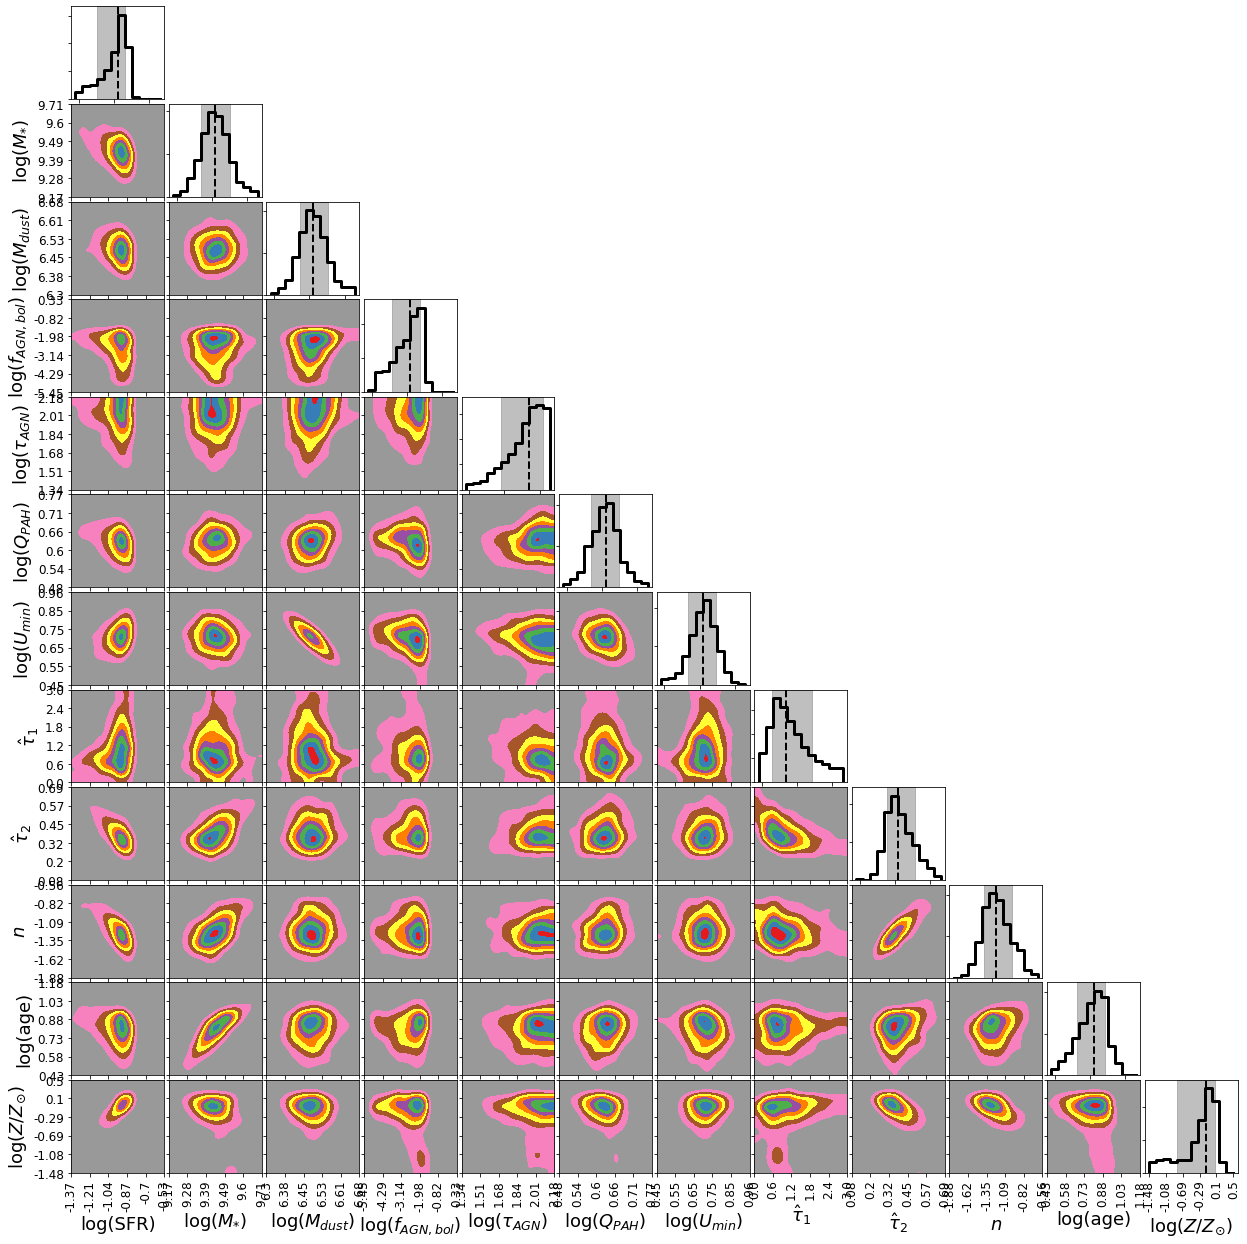

In [13]:
%matplotlib inline

name_sampler_fits = "mcmc_bin1.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_fagn_bol', 'log_tauagn', 'log_qpah', 'log_umin', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_fagn_bol': 'log($f_{AGN,bol}$)', 
              'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 'log_qpah': 'log($Q_{PAH}$)',
              'log_sfr': 'log(SFR)', 'log_tauagn': 'log($\\tau_{AGN}$)', 'log_umin': 'log($U_{min}$)', 
              'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

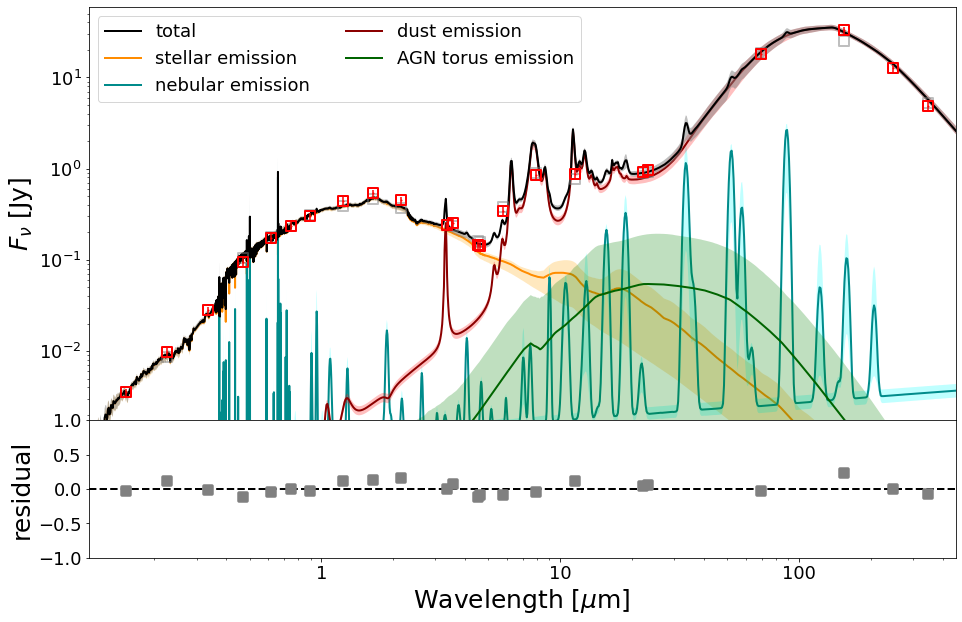

In [14]:
name_sampler_fits = "mcmc_bin1.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')

### Spatial bin 3

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin3.png'

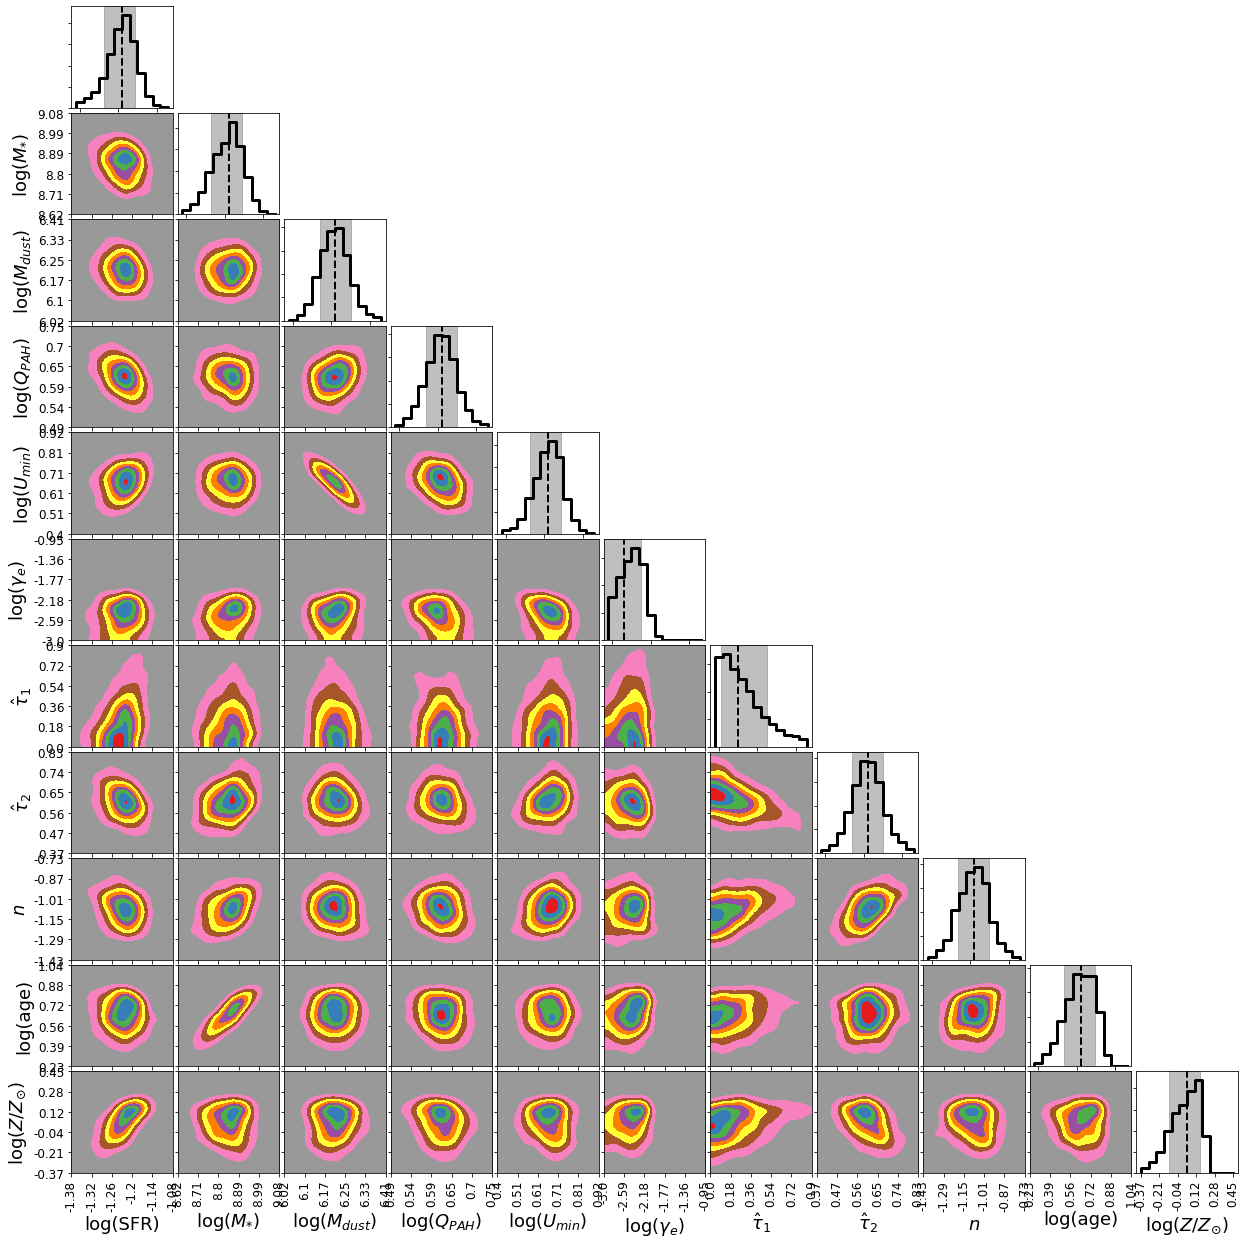

In [18]:
name_sampler_fits = "mcmc_bin3.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_qpah', 'log_umin', 'log_gamma', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 
              'log_qpah': 'log($Q_{PAH}$)','log_sfr': 'log(SFR)', 'log_umin': 'log($U_{min}$)', 
               'log_gamma': 'log($\\gamma_{e}$)', 'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

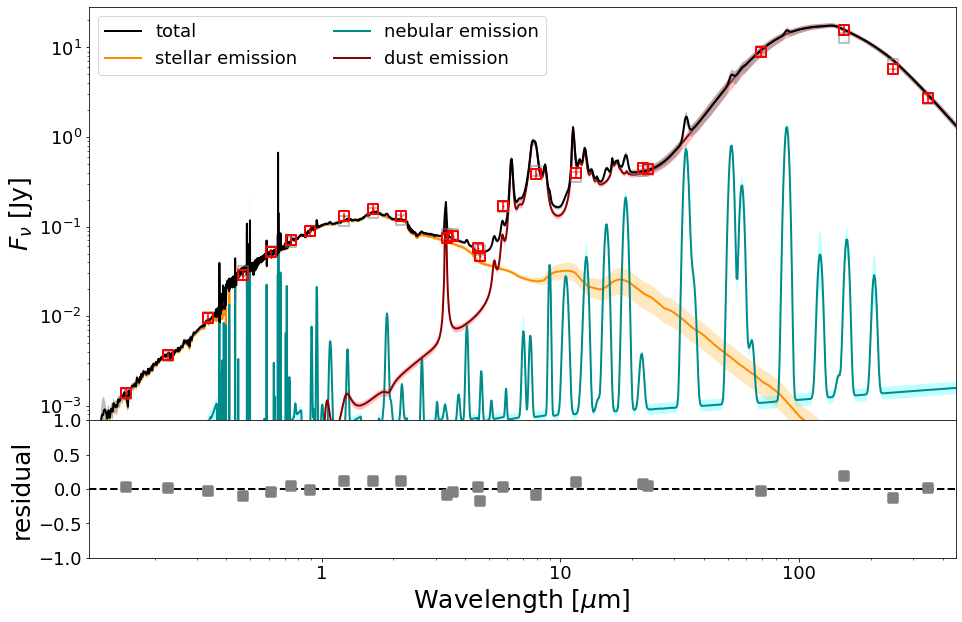

In [19]:
name_sampler_fits = "mcmc_bin3.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')

### Spatial bin 5

Plotting posteriors probability distributions
=> Number of parameters: 10


'corner_mcmc_bin5.png'

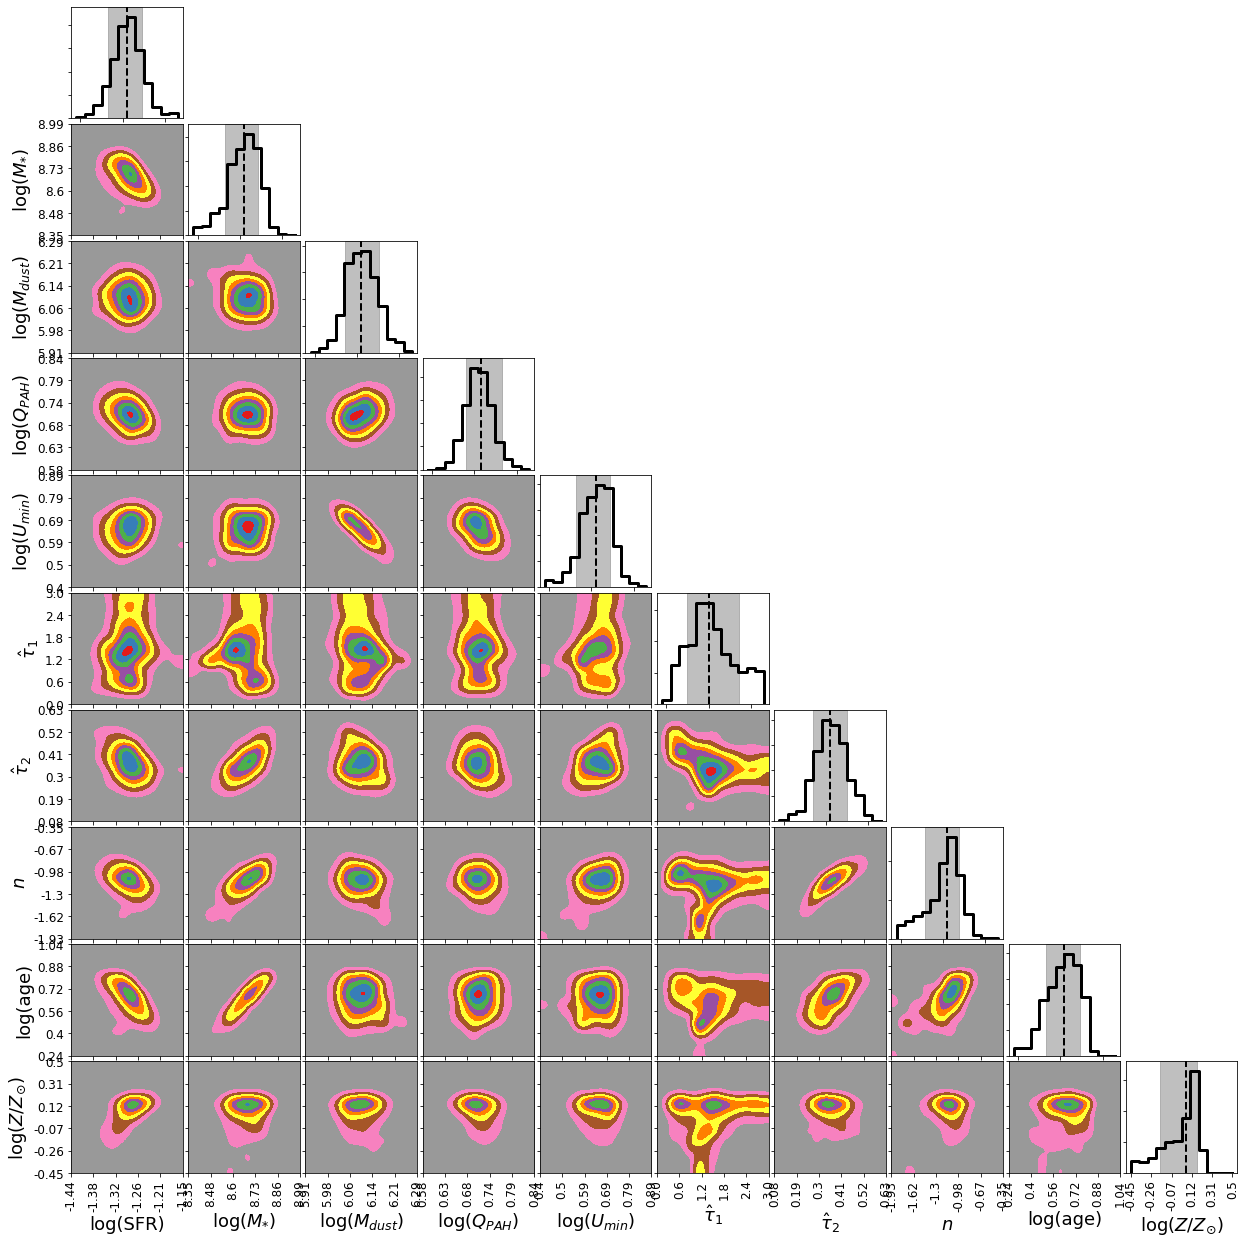

In [34]:
name_sampler_fits = "mcmc_bin5.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_qpah', 'log_umin', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 
              'log_qpah': 'log($Q_{PAH}$)','log_sfr': 'log(SFR)', 'log_umin': 'log($U_{min}$)', 
               'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

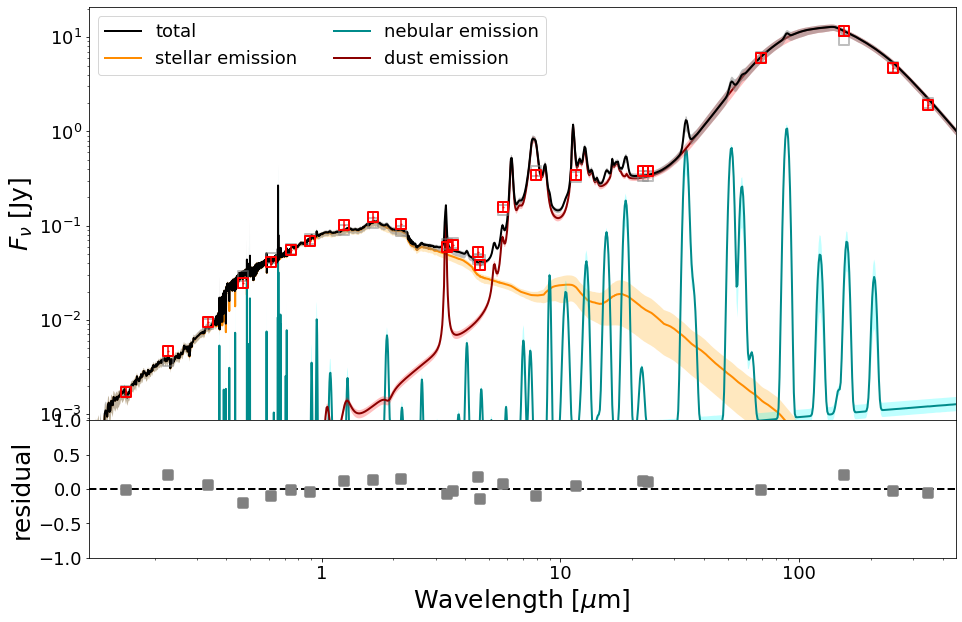

In [33]:
name_sampler_fits = "mcmc_bin5.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')

### Spatial bin 61

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin61.png'

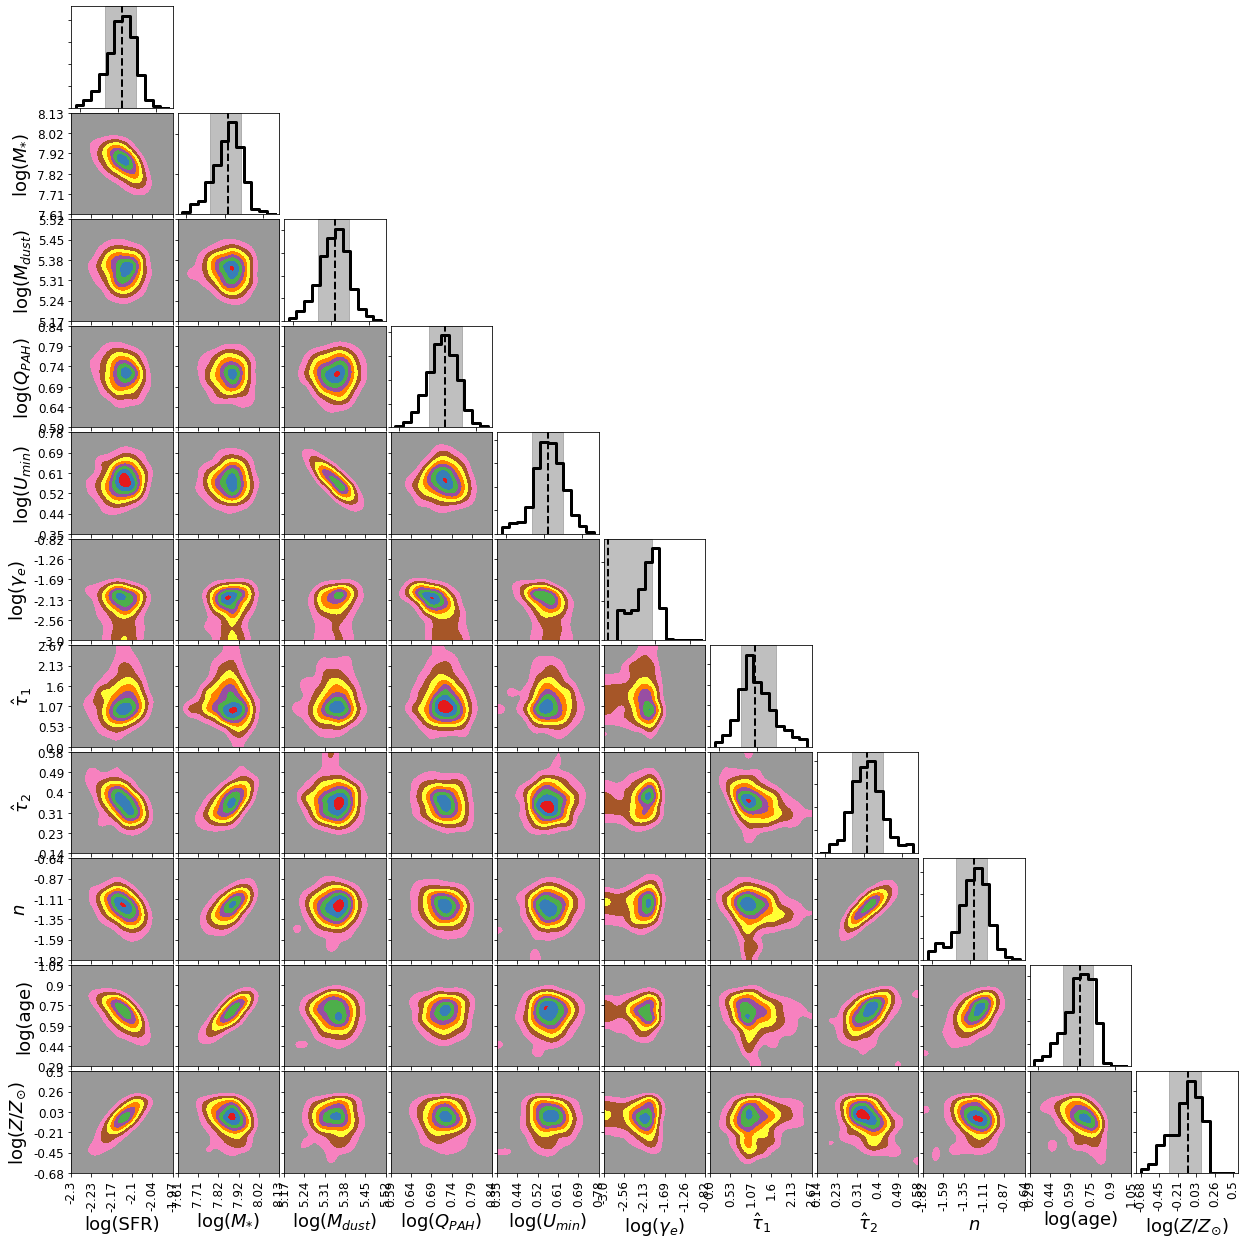

In [22]:
name_sampler_fits = "mcmc_bin61.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_qpah', 'log_umin', 'log_gamma', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 
              'log_qpah': 'log($Q_{PAH}$)','log_sfr': 'log(SFR)', 'log_umin': 'log($U_{min}$)', 
               'log_gamma': 'log($\\gamma_{e}$)', 'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

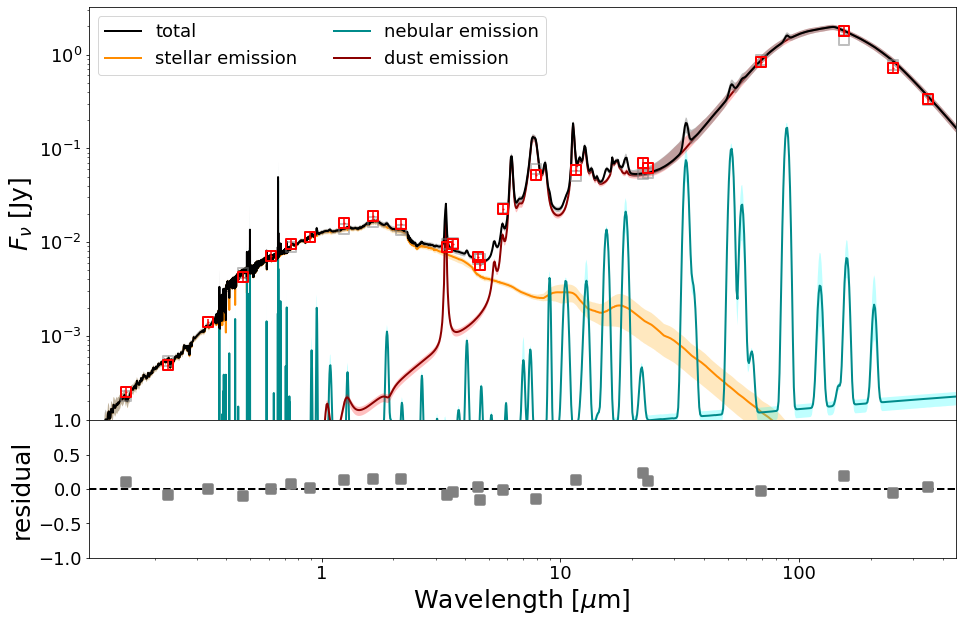

In [23]:
name_sampler_fits = "mcmc_bin61.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')

### Spatial bin 91

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin91.png'

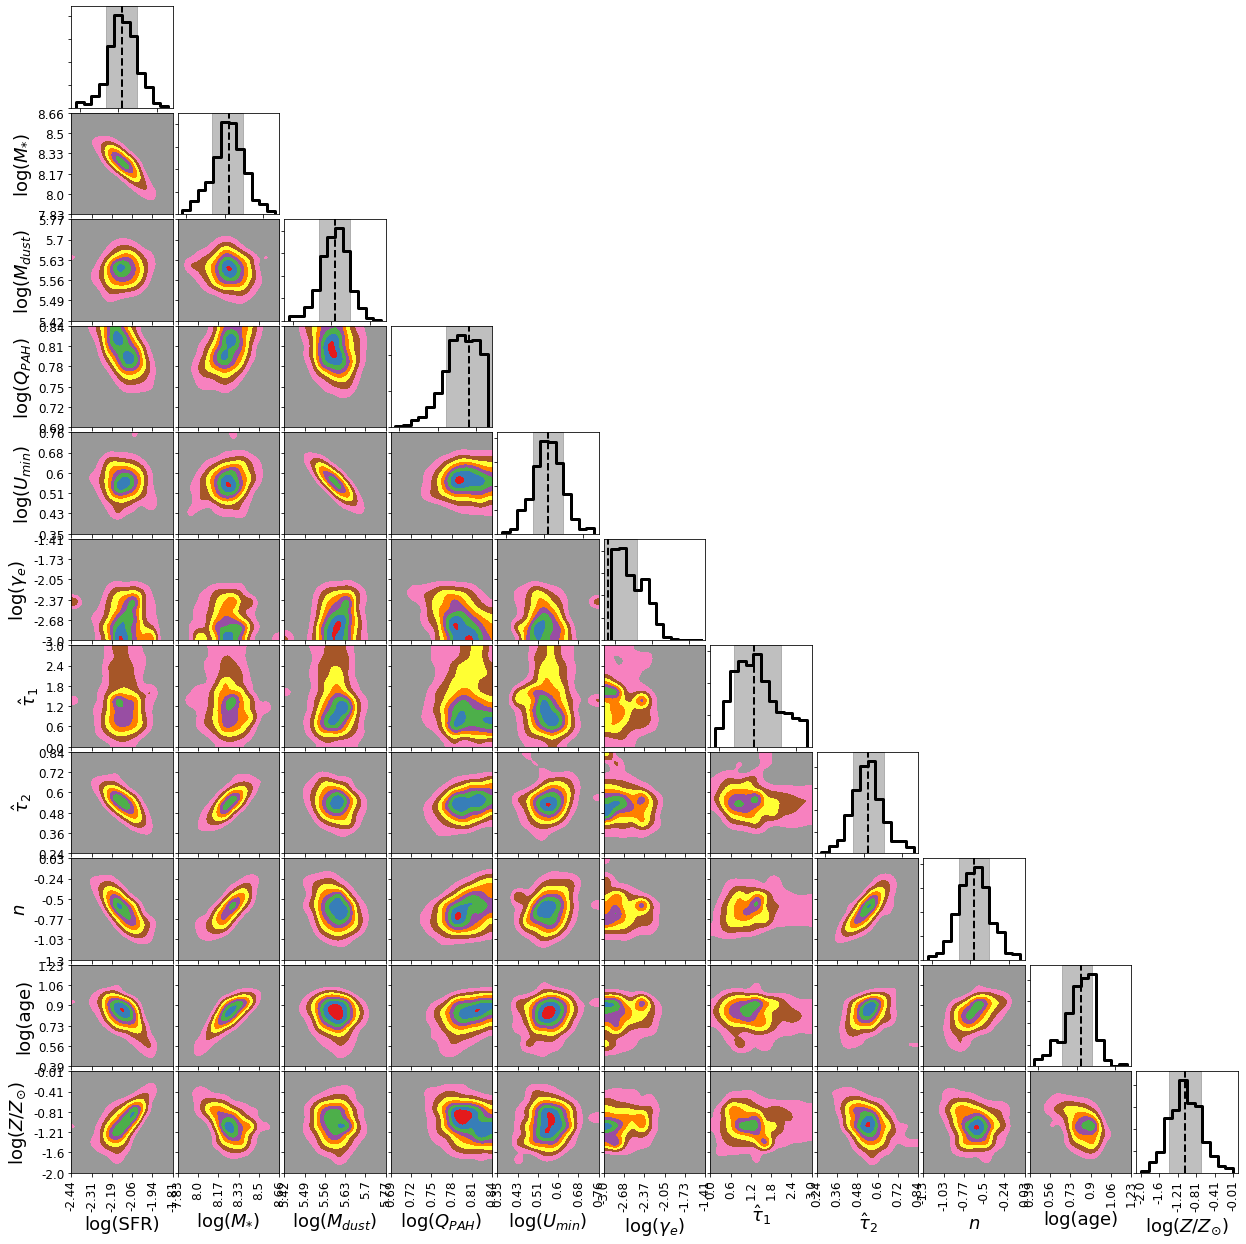

In [24]:
name_sampler_fits = "mcmc_bin91.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_qpah', 'log_umin', 'log_gamma', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 
              'log_qpah': 'log($Q_{PAH}$)','log_sfr': 'log(SFR)', 'log_umin': 'log($U_{min}$)', 
               'log_gamma': 'log($\\gamma_{e}$)', 'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

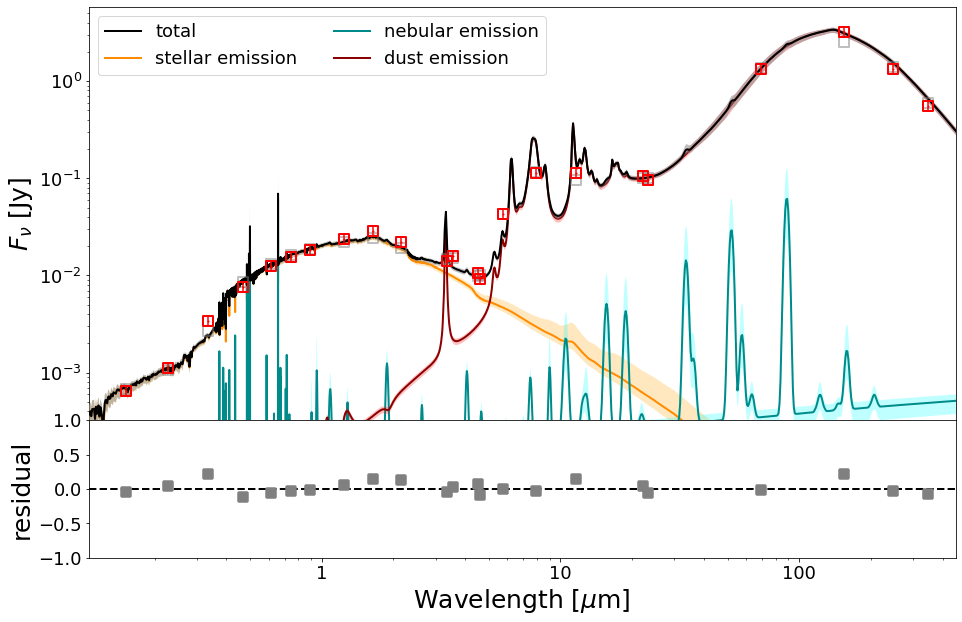

In [25]:
name_sampler_fits = "mcmc_bin91.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')

### Spatial bin 151

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin151.png'

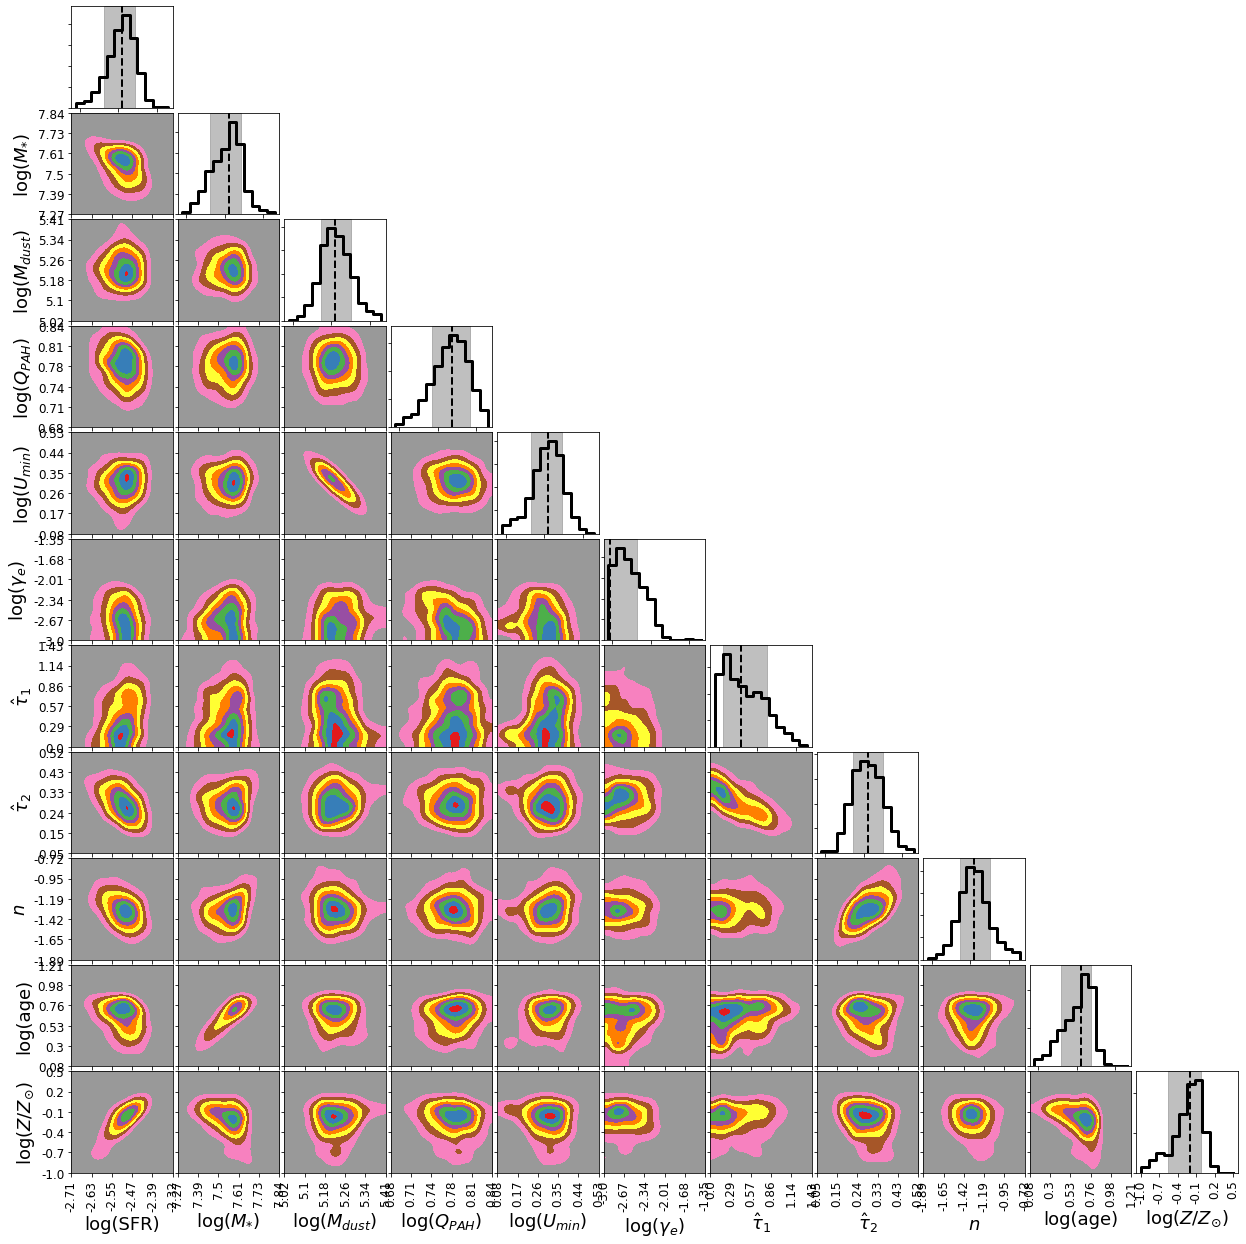

In [30]:
name_sampler_fits = "mcmc_bin151.fits"

params=['log_sfr', 'log_mass', 'log_dustmass', 'log_qpah', 'log_umin', 'log_gamma', 
        'dust1', 'dust2', 'dust_index', 'log_mw_age', 'logzsol']
label_params={'dust1': '$\\hat \\tau_{1}$', 'dust2': '$\\hat \\tau_{2}$', 'dust_index': '$n$', 
              'log_dustmass': 'log($M_{dust}$)',  'log_mass': 'log($M_{*}$)', 'log_mw_age': 'log(age)', 
              'log_qpah': 'log($Q_{PAH}$)','log_sfr': 'log(SFR)', 'log_umin': 'log($U_{min}$)', 
               'log_gamma': 'log($\\gamma_{e}$)', 'logzsol': 'log($Z/Z_{\\odot}$)'}

plot_corner(name_sampler_fits, params=params, label_params=label_params, 
            fontsize_label=18, fontsize_tick=12)

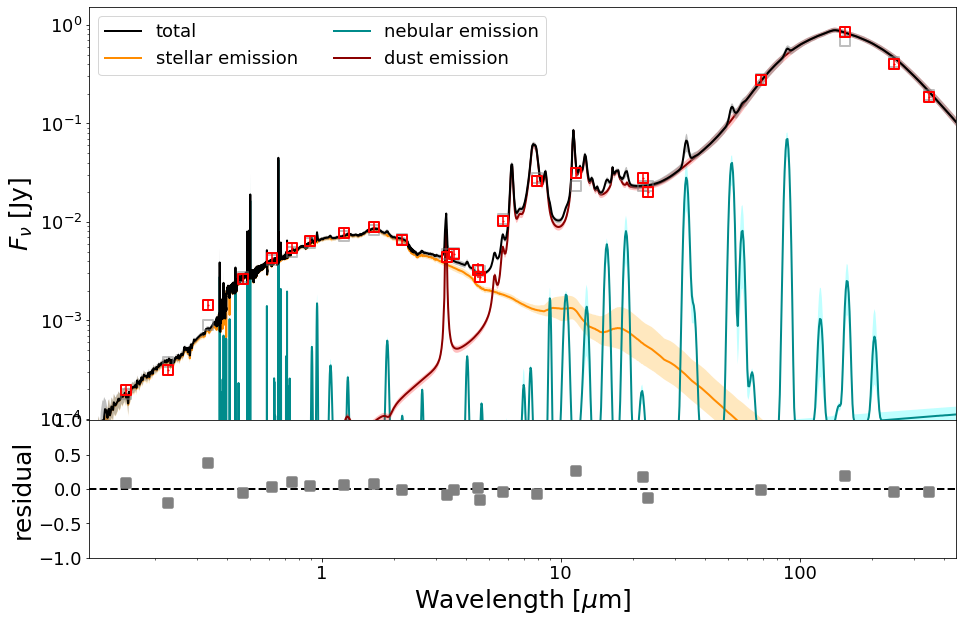

In [31]:
name_sampler_fits = "mcmc_bin151.fits"
plot_SED(name_sampler_fits, loc_legend=2, decompose=1, funit='Jy')